In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import requests

In [2]:
# One Method
# url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&apikey=ID7KLMK65L6JXPQ1'
#url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AAPL&interval=5min&apikey=ID7KLMK65L6JXPQ1'
#r = requests.get(url)
#data = r.json()

#print(data)

In [3]:
key = 'ID7KLMK65L6JXPQ1'

In [31]:
# Another Method
ts = TimeSeries(key, output_format='pandas')
data, meta = ts.get_daily('AMC', outputsize='full')
meta

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'AMC',
 '3. Last Refreshed': '2022-02-11',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [32]:
columns = ['open', 'high', 'low', 'close', 'volume']
data.columns = columns
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2053 entries, 2022-02-11 to 2013-12-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2053 non-null   float64
 1   high    2053 non-null   float64
 2   low     2053 non-null   float64
 3   close   2053 non-null   float64
 4   volume  2053 non-null   float64
dtypes: float64(5)
memory usage: 96.2 KB


In [33]:
data.head()

,open,high,low,close,volume
date,,,,,
2022-02-11,18.62,19.66,18.331,18.81,68425903.0
2022-02-10,17.90,20.96,17.850,18.59,98957390.0
2022-02-09,16.30,19.00,16.140,18.94,75867368.0
2022-02-08,14.90,16.82,14.650,16.43,51272462.0
2022-02-07,15.62,16.00,14.680,14.91,29755158.0


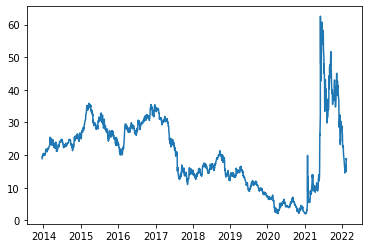

In [34]:
# One month plot
plt.plot(data['close'])

In [35]:
data['change'] = data.apply(lambda row: (row.close - row.open)/row.open * 100, axis=1)
data.head()

,open,high,low,close,volume,change
date,,,,,,
2022-02-11,18.62,19.66,18.331,18.81,68425903.0,1.020408
2022-02-10,17.90,20.96,17.850,18.59,98957390.0,3.854749
2022-02-09,16.30,19.00,16.140,18.94,75867368.0,16.196319
2022-02-08,14.90,16.82,14.650,16.43,51272462.0,10.268456
2022-02-07,15.62,16.00,14.680,14.91,29755158.0,-4.545455


In [36]:
data['day rating'] = pd.NaT

# Bad day formatting
# Still working on rating formula (0 to 100)
data.loc[data['change'] <= -30, 'day rating'] = -5
data.loc[(data['change'] <= -15) & (data['change'] > -30) , 'day rating'] = -4
data.loc[(data['change'] <= -7) & (data['change'] > -15) , 'day rating'] = -3
data.loc[(data['change'] <= -3) & (data['change'] > -7) , 'day rating'] = -2
data.loc[(data['change'] <= 0) & (data['change'] > -3) , 'day rating'] = -1
                                   
data.loc[(data['change'] < 1) & (data['change'] > 0) , 'day rating'] = 0
                                   
data.loc[(data['change'] <= 3) & (data['change'] >= 1) , 'day rating'] = 1
data.loc[(data['change'] <= 7) & (data['change'] > 3) , 'day rating'] = 2
data.loc[(data['change'] <= 15) & (data['change'] > 7) , 'day rating'] = 3
data.loc[(data['change'] <= 30) & (data['change'] > 15) , 'day rating'] = 4
data.loc[data['change'] > 30 , 'day rating'] = 5                                   

In [37]:
data.head()

,open,high,low,close,volume,change,day rating
date,,,,,,,
2022-02-11,18.62,19.66,18.331,18.81,68425903.0,1.020408,1
2022-02-10,17.90,20.96,17.850,18.59,98957390.0,3.854749,2
2022-02-09,16.30,19.00,16.140,18.94,75867368.0,16.196319,4
2022-02-08,14.90,16.82,14.650,16.43,51272462.0,10.268456,3
2022-02-07,15.62,16.00,14.680,14.91,29755158.0,-4.545455,-2


In [43]:
# To get data of specific day where it was a bad trading day
data.loc[data['day rating'] <= -3]
#data.loc[data['day rating'] < -4].filter(like='date')

,open,high,low,close,volume,change,day rating
date,,,,,,,
2022-02-01,18.15,18.71,16.5200,16.86,124427691.0,-7.107438,-3
2022-01-27,16.11,16.59,14.3950,14.52,50530189.0,-9.869646,-3
2022-01-13,22.65,23.15,20.5250,20.66,41004986.0,-8.785872,-3
2022-01-05,25.17,25.30,22.3618,22.75,45172063.0,-9.614621,-3
2021-12-13,27.49,27.63,22.4600,23.24,84199780.0,-15.460167,-4
...,...,...,...,...,...,...,...
2017-11-30,15.65,15.65,14.0500,14.25,5250699.0,-8.945687,-3
2017-11-03,12.95,13.05,11.8000,11.90,5717891.0,-8.108108,-3
2017-10-09,15.20,15.20,13.8250,14.00,6321509.0,-7.894737,-3


In [41]:
# To get data of specific day where it was a bad trading day
cols = ['date']
data.loc[data['day rating'] == 4]
#data.loc[data['day rating'] > 4].filter(like='date')

,open,high,low,close,volume,change,day rating
date,,,,,,,
2022-02-09,16.30,19.000,16.140,18.94,75867368.0,16.196319,4
2021-12-17,24.39,30.710,23.650,29.12,144753081.0,19.393194,4
2021-12-14,20.91,25.120,20.800,24.50,107045755.0,17.168819,4
2021-08-24,37.19,48.200,36.350,44.26,228489647.0,19.010487,4
2021-07-20,35.14,44.390,35.130,43.09,168673390.0,22.623791,4
2021-07-08,40.95,49.790,38.760,47.94,145078221.0,17.069597,4
2021-05-25,13.61,16.670,13.552,16.41,213644127.0,20.573108,4
2021-05-13,10.88,14.200,10.640,12.77,296524953.0,17.371324,4
2021-03-25,8.96,11.315,8.950,10.94,131192830.0,22.098214,4


####Additional Testing (Crypto)

In [54]:
# Another Method
ts = CryptoCurrencies(key, output_format='pandas')
cData, meta = ts.get_digital_currency_daily('BTC', market='USD')
meta

{'1. Information': 'Daily Prices and Volumes for Digital Currency',
 '2. Digital Currency Code': 'BTC',
 '3. Digital Currency Name': 'Bitcoin',
 '4. Market Code': 'USD',
 '5. Market Name': 'United States Dollar',
 '6. Last Refreshed': '2022-02-12 00:00:00',
 '7. Time Zone': 'UTC'}

In [55]:
cData.head()

,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2022-02-12,42373.73,42373.73,42415.45,42415.45,42221.38,42221.38,42309.39,42309.39,677.20503,677.20503
2022-02-11,43495.44,43495.44,43920.00,43920.00,41938.51,41938.51,42373.73,42373.73,44975.16870,44975.16870
2022-02-10,44372.71,44372.71,45821.00,45821.00,43174.01,43174.01,43495.44,43495.44,62357.29091,62357.29091
2022-02-09,44043.00,44043.00,44799.00,44799.00,43117.92,43117.92,44372.72,44372.72,34428.16729,34428.16729
2022-02-08,43839.99,43839.99,45492.00,45492.00,42666.00,42666.00,44042.99,44042.99,64880.29387,64880.29387


In [56]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2022-02-12 to 2019-05-20
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   1a. open (USD)       1000 non-null   float64
 1   1b. open (USD)       1000 non-null   float64
 2   2a. high (USD)       1000 non-null   float64
 3   2b. high (USD)       1000 non-null   float64
 4   3a. low (USD)        1000 non-null   float64
 5   3b. low (USD)        1000 non-null   float64
 6   4a. close (USD)      1000 non-null   float64
 7   4b. close (USD)      1000 non-null   float64
 8   5. volume            1000 non-null   float64
 9   6. market cap (USD)  1000 non-null   float64
dtypes: float64(10)
memory usage: 85.9 KB


In [60]:
cData.drop(columns=['1b. open (USD)', '2b. high (USD)', '3b. low (USD)', '4b. close (USD)'], inplace=True)

In [62]:
columns = ['open', 'high', 'low', 'close', 'volume', 'market cap']
cData.columns = columns
cData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2022-02-12 to 2019-05-20
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   open        1000 non-null   float64
 1   high        1000 non-null   float64
 2   low         1000 non-null   float64
 3   close       1000 non-null   float64
 4   volume      1000 non-null   float64
 5   market cap  1000 non-null   float64
dtypes: float64(6)
memory usage: 54.7 KB


In [63]:
cData.head()

,open,high,low,close,volume,market cap
date,,,,,,
2022-02-12,42373.73,42415.45,42221.38,42309.39,677.20503,677.20503
2022-02-11,43495.44,43920.00,41938.51,42373.73,44975.16870,44975.16870
2022-02-10,44372.71,45821.00,43174.01,43495.44,62357.29091,62357.29091
2022-02-09,44043.00,44799.00,43117.92,44372.72,34428.16729,34428.16729
2022-02-08,43839.99,45492.00,42666.00,44042.99,64880.29387,64880.29387


In [64]:
cData['change'] = cData.apply(lambda row: row.close - row.open, axis=1)
cData.head()

,open,high,low,close,volume,market cap,change
date,,,,,,,
2022-02-12,42373.73,42415.45,42221.38,42309.39,677.20503,677.20503,-64.34
2022-02-11,43495.44,43920.00,41938.51,42373.73,44975.16870,44975.16870,-1121.71
2022-02-10,44372.71,45821.00,43174.01,43495.44,62357.29091,62357.29091,-877.27
2022-02-09,44043.00,44799.00,43117.92,44372.72,34428.16729,34428.16729,329.72
2022-02-08,43839.99,45492.00,42666.00,44042.99,64880.29387,64880.29387,203.00


In [10]:
data['TradeDate'] = data.index.date
data['time'] = data.index.time

In [11]:
# To get data of specific day
data.loc['2022-2-03']

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2022-02-03,174.48,176.2399,172.12,172.9,89418074.0,2022-02-03,00:00:00


In [12]:
market = data.between_time('04:30:00', '20:00:00').copy()
market.sort_index(inplace=True)
market.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       0 non-null      float64
 1   high       0 non-null      float64
 2   low        0 non-null      float64
 3   close      0 non-null      float64
 4   volume     0 non-null      float64
 5   TradeDate  0 non-null      object 
 6   time       0 non-null      object 
dtypes: float64(5), object(2)
memory usage: 0.0+ bytes


In [13]:
market.groupby('TradeDate').agg({'low':min, 'high':max})

,low,high
TradeDate,,
